# Regressão linear de pontos experimentais

## Código super simples

In [15]:
#Entrada de dados experimentais, valores de x e y, importando o pacote numpy
import numpy as np
x = np.array([0, 1., 2., 3, 4, 5, 6])
y = np.array([0, 2.2, 4.1, 6.7, 8.0, 9.8, 13])
print(x)
print (y)

[0. 1. 2. 3. 4. 5. 6.]
[ 0.   2.2  4.1  6.7  8.   9.8 13. ]


In [30]:
#Utilizando a função polyfit para ajustar o modelo

#np.polyfit?

Colocar o nome da função e o ponto de interrogação entrará nas informações necessárias para aplicar a função.
A função np.polyfit, você entra com os valores de x, depois de y, e que grau de polinômio você quer ajustar, neste caso usaremos grau 1 (regressão linear)

In [18]:
mod_linear = np.polyfit(x, y, 1)
print(mod_linear)

[2.075      0.03214286]


In [19]:
# y = a * x + b
a = float(mod_linear[0])
b = float(mod_linear[1])
print(a)
print(b)


2.0749999999999997
0.03214285714286358


In [20]:
y_mod = a * x + b
print(y_mod)

[ 0.03214286  2.10714286  4.18214286  6.25714286  8.33214286 10.40714286
 12.48214286]


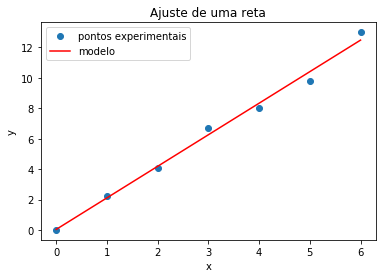

In [22]:
#importando o pacote matplotlib para a construção do gráfico
import matplotlib.pyplot as plt
plt.plot(x,y, "o", label = "pontos experimentais")
plt.plot(x,y_mod, "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

## Refazendo sem imprimir tantos parâmetros

Vamos colocar uma mensagem imprimindo os valores do coeficiente angular e do coeficiente linear

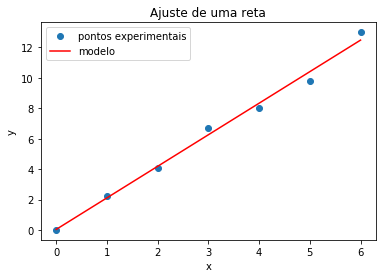

Coeficiente angular:  2.075
Coeficiente linear:  0.032


In [29]:
import numpy as np
x = np.array([0, 1., 2., 3, 4, 5, 6])
y = np.array([0, 2.2, 4.1, 6.7, 8.0, 9.8, 13])

mod_linear = np.polyfit(x, y, 1)

a = float(mod_linear[0])
b = float(mod_linear[1])

y_mod = a * x + b

import matplotlib.pyplot as plt
plt.plot(x,y, "o", label = "pontos experimentais")
plt.plot(x,y_mod, "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

print(f"Coeficiente angular: {a:6.3f}")
print(f"Coeficiente linear: {b:6.3f}")


Vamos estimar o coeficiente de determinação

In [34]:
#Calculando o coeficiente de determinação do ajuste
yresid = y - y_mod
SQresid = sum(yresid**2)
y_tot = y - np.mean(y)
SQtotal = sum(y_tot**2)
R2 = 1 - SQresid/SQtotal
print('O coeficiente de determinação do ajuste é {:.4f}'.format(R2))

O coeficiente de determinação do ajuste é 0.9921


Existem outras bibliotecas e funções que realizam a mesma tarefa, por exemplo linergress da biblioteca Scipy, porém esta já apresenta o coeficiente de determinação estimado.

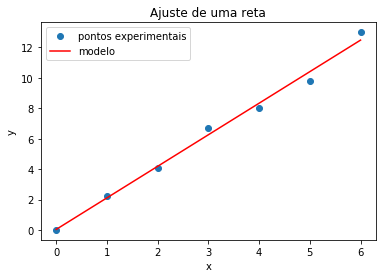

Coeficiente angular:  2.075
Coeficiente linear:  0.032
Coeficiente de determinação: 0.9921


In [46]:
import numpy as np
x = np.array([0, 1., 2., 3, 4, 5, 6])
y = np.array([0, 2.2, 4.1, 6.7, 8.0, 9.8, 13])

from scipy import stats

a, b, r, p_value, std_err = stats.linregress(x, y)

y_mod = a * x + b

import matplotlib.pyplot as plt
plt.plot(x,y, "o", label = "pontos experimentais")
plt.plot(x,y_mod, "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

print(f"Coeficiente angular: {a:6.3f}")
print(f"Coeficiente linear: {b:6.3f}")
print(f"Coeficiente de determinação: {r**2:6.4f}")

Agora vamos importar os dados experimentais de uma planilha do Excel, o arquivo excel tem que estar na pasta onde está o arquivo do Notebook

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importando os dados
importado = pd.read_excel("entrada_dados_linear.xlsx")
importado_np = importado.values
x = importado_np[:,0]
y = importado_np[:,1]
#ajustando o modelo linear
print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.    1.1   4.2   5.8   7.9  10.12 11.68 14.   16.2  17.78 19.92]


Utilizaremos a função polyval para estimar os pontos do modelo

In [49]:
#ajustando o modelo linear
modelo_linear = np.polyfit(x,y,1)
modelo_y = np.polyval(modelo_linear, x) # A função polyval estima um polinômio de grau de acordo com a entrada de dados

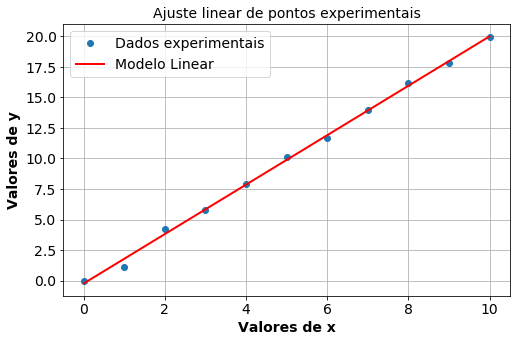

In [51]:
# Comando para determinar o tamanho segundo o qual os textos grafados no gráfico serão impressos na tela:
SMALL_SIZE = 14                        
MEDIUM_SIZE = 20                       
BIGGER_SIZE = 20   
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

#construindo o gráfico
f = plt.figure()     
ax = f.add_subplot(111)                                                
lns1 = ax.plot(x,y,'o',label='Dados experimentais')    
lns2 = ax.plot(x,modelo_y,'red',linewidth=2,label='Modelo Linear')
ax.set_title("Ajuste linear de pontos experimentais")  
ax.set_xlabel('Valores de x',weight='bold')               
ax.set_ylabel('Valores de y', weight='bold')
ax.grid(True)                                                   
f.set_figheight(5)                                                 
f.set_figwidth(8)
ax.legend(loc=0)                                                   
f.patch.set_facecolor('white')                                       
plt.style.use('default') 
plt.savefig('Linearizacao.png', dpi=400)  
plt.show()   

In [52]:
#Estimando o coeficiente de determinação
yresid = y - modelo_y
SQresid = sum(yresid**2)
y_tot = y - np.mean(y)
SQtotal = sum(y_tot**2)
R2 = 1 - SQresid/SQtotal
#Impressão dos resultados
print('O coeficiente angular é {:.4f}'.format(modelo_linear[0]))
print('O coeficiente linear é {:.4f}'.format(modelo_linear[1]))
print('O coeficiente de determinação do ajuste é {:.4f}'.format(R2))
#Escrevendo o arquivo de saída xlsx, exporta um arquivo com todas as informações
df_concents= pd.DataFrame({'Valores de x': x, 'Valores de y':y, 'y do modelo':modelo_y, 'coeficiente angular':modelo_linear[0], 'coeficiente linear':modelo_linear[1]})
with pd.ExcelWriter('Saída_de_dados_linear.xlsx') as writer:
    df_concents.to_excel(writer, sheet_name="Output_concent")
    writer.save()

O coeficiente angular é 2.0227
O coeficiente linear é -0.2318
O coeficiente de determinação do ajuste é 0.9980


## Regressão linear com vários pontos experimentais

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#importando os dados
importado = pd.read_excel("media_desvio_dados.xlsx")
importado_np = importado.values
x = importado_np[:,0]
y_1 = importado_np[:,1]
y_2 = importado_np[:,2]
y_3 = importado_np[:,3]

y = np.array([y1,y2,y3])
y = np.transpose(y)


Estima a média e desvio padrão da triplicata dos valores de y

In [80]:
y_media = np.mean(y, axis = 1)
y_std = np.std(y, axis = 1)

media, sigma = np.mean(y, axis = 1), np.std(y, axis = 1)

conf_int = stats.norm.interval(0.95, loc=media, scale=sigma) # Aqui utilizamos o intervalo de confiança de 95%

In [81]:
# Os valores menor e maior, será utilizado para construir no gráfico a barra de erros
menor = np.array(conf_int[0])
maior = np.array(conf_int[1])

In [82]:
# Utilizando a função linregress
a, b, r, p_value, std_err = stats.linregress(x, y_media) 

y_mod = a * x + b


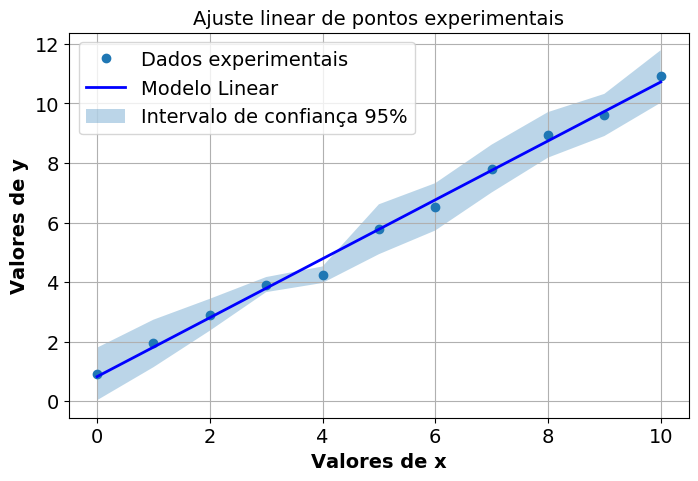

In [83]:
## Comando para determinar o tamanho segundo o qual os textos grafados no gráfico serão impressos na tela:
SMALL_SIZE = 14                        
MEDIUM_SIZE = 20                       
BIGGER_SIZE = 20   
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

#construindo o gráfico
f = plt.figure()     
ax = f.add_subplot(111)                                                
lns1 = ax.plot(x,y_media,'o',label='Dados experimentais')    
lns2 = ax.plot(x,y_mod,'b',linewidth=2,label='Modelo Linear')
ax.set_title("Ajuste linear de pontos experimentais") 
ax.fill_between(x, menor, maior, alpha=0.3, label = 'Intervalo de confiança 95%') 
ax.set_xlabel('Valores de x',weight='bold')               
ax.set_ylabel('Valores de y', weight='bold')
ax.grid(True)                                                   
f.set_figheight(5)                                                 
f.set_figwidth(8)
ax.legend(loc=0)                                                   
f.patch.set_facecolor('white')                                       
plt.style.use('default') 
plt.savefig('Linearizacao_com_media.png', dpi=400)  
plt.show()   

In [84]:
#Impressão dos resultados
print('O coeficiente angular é {:.4f}'.format(modelo_linear[0]))
print('O coeficiente linear é {:.4f}'.format(modelo_linear[1]))
print('O coeficiente de determinação do ajuste é {:.4f}'.format(r**2))
#Escrevendo o arquivo de saída xlsx
df_concents= pd.DataFrame({'Valores de x': x, 'Valores de y media':y_media, 'y do modelo':modelo_y, 'coeficiente angular':modelo_linear[0], 'coeficiente linear':modelo_linear[1]})
with pd.ExcelWriter('Saída_de_dados_linear_media.xlsx') as writer:
    df_concents.to_excel(writer, sheet_name="Output_concent")
    writer.save()

O coeficiente angular é 2.0227
O coeficiente linear é -0.2318
O coeficiente de determinação do ajuste é 0.9955
